In [1]:
%matplotlib inline
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 処理に時間のかかる場合はデータを削減 
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 5 #20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

train loss:2.2999340392488277
=== epoch:1, train acc:0.319, test acc:0.333 ===
train loss:2.2967510771236475
train loss:2.292295473665006
train loss:2.2845332240482192
train loss:2.278466503020664
train loss:2.268983182808679
train loss:2.2587876904837083
train loss:2.2269053090467836
train loss:2.195416814405633
train loss:2.1954446123439277
train loss:2.1183119021500283
train loss:2.115570384629558
train loss:2.0788151294932273
train loss:1.9682859549349592
train loss:1.99436301125236
train loss:1.8914214572372867
train loss:1.8951868355176356
train loss:1.7844102622076405
train loss:1.6743608673862282
train loss:1.6495919634993372
train loss:1.6640617775071536
train loss:1.5655140190243473
train loss:1.4331437833297989
train loss:1.3682484082568989
train loss:1.284436968386383
train loss:1.2653503477057493
train loss:1.147293654516348
train loss:1.0614229158088557
train loss:0.9862308848848688
train loss:0.8661766132245671
train loss:0.7944679796182625
train loss:0.8714055008310111


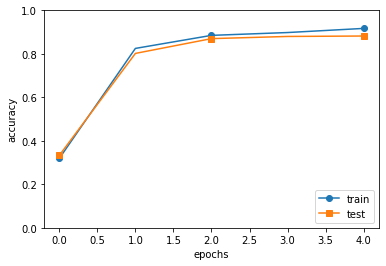

In [2]:
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# パラメータの保存
network.save_params("params.pkl")
print("Saved Network Parameters!")

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 感想
画像学習の基礎を学び終えた(?)が、まだブラックボックスになっている部分もある。大まかでもいいから、実践していく中で学ぶことができたらと思う。
### 参考文献
[深層学習による画像認識・生成](https://www.inf.uec.ac.jp/kobo2021/?%E6%B7%B1%E5%B1%A4%E5%AD%A6%E7%BF%92%E3%81%AB%E3%82%88%E3%82%8B%E7%94%BB%E5%83%8F%E8%AA%8D%E8%AD%98%E3%83%BB%E7%94%9F%E6%88%90#d16d8e7e)